In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [188]:
price_2 = pd.read_csv('prices_round_2_day_-1.csv', sep=';')
price_1 = pd.read_csv('prices_round_2_day_0.csv', sep=';')
price_0 = pd.read_csv('prices_round_2_day_1.csv', sep=';')
all_ob = pd.read_csv('website_orderbook.csv', sep=';')

df = pd.concat([price_2, price_1, price_0]).reset_index(drop=True)
ob = all_ob[all_ob['product'] == 'ORCHIDS']
df['pairwiseDif'] = df['ORCHIDS'] - df['ORCHIDS'].shift(1)
df['pairwiseDif'].describe()


count    30002.000000
mean        -0.005491
std          1.388569
min       -116.250000
25%         -0.500000
50%          0.000000
75%          0.500000
max        112.500000
Name: pairwiseDif, dtype: float64

In [189]:
for column in df.columns:
    print(column)
    print(df[column].describe())
    print()

print("OB MID_PRICE")
print(ob['mid_price'].describe())

timestamp
count      30003.000000
mean      500000.000000
std       288708.812038
min            0.000000
25%       250000.000000
50%       500000.000000
75%       750000.000000
max      1000000.000000
Name: timestamp, dtype: float64

ORCHIDS
count    30003.000000
mean      1103.617855
std         81.975222
min        960.750000
25%       1039.250000
50%       1081.750000
75%       1195.750000
max       1257.250000
Name: ORCHIDS, dtype: float64

TRANSPORT_FEES
count    30003.000000
mean         1.237043
std          0.287521
min          0.700000
25%          1.000000
50%          1.300000
75%          1.400000
max          2.100000
Name: TRANSPORT_FEES, dtype: float64

EXPORT_TARIFF
count    30003.000000
mean         9.728044
std          1.368582
min          7.500000
25%          8.500000
50%          9.500000
75%         10.500000
max         19.500000
Name: EXPORT_TARIFF, dtype: float64

IMPORT_TARIFF
count    30003.000000
mean        -3.405143
std          1.235526
min         -6

# LINEAR REGRESSION

## Humidity

In [190]:
# # Prepare X, y
# from sklearn.model_selection import train_test_split

# hum_lag, hum_window = 145, 840
# sun_lag, sun_window = 145, 840
# lags = range(0, 150, 5)
# windows = range(1, 850, 30)

# def process_dataframe(df, hum_lag, hum_window):
#     temp_data = pd.DataFrame()
#     temp_data["hum_prod_dec"] = abs(df["HUMIDITY"] - 70) / 5.0 * 2.0
#     temp_data['hum_prod_dec'] = temp_data['hum_prod_dec'].shift(hum_lag).rolling(window=hum_window).mean()

#     temp_data["sun_prod_dec"] = (2500 - df["SUNLIGHT"]) / 60 * 4
#     temp_data['sun_prod_dec'] = temp_data['sun_prod_dec'].shift(sun_lag).rolling(window=sun_window).mean()

#     temp_data["price"] = df['ORCHIDS']
#     temp_data.dropna(inplace=True)

#     return temp_data

# results = []
# for hum_lag in lags:
#     for hum_window in windows:
#         # Process each DataFrame
#         data_2 = process_dataframe(price_2, hum_lag, hum_window)
#         data_1 = process_dataframe(price_1, hum_lag, hum_window)
#         data_0 = process_dataframe(price_0, hum_lag, hum_window)

#         # Concatenate all DataFrames
#         data = pd.concat([data_2, data_1, data_0], ignore_index=True)

#         # Prepare X, y
#         X = data[['hum_prod_dec', 'sun_prod_dec']]
#         y = data['price']

#         X.head()
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#         model = LinearRegression()
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         r2 = r2_score(y_test, y_pred)

#         results.append((lag, window, r2))

# results.sort(key=lambda x: abs(x[2]), reverse=True)
# best_lag, best_window, best_corr = results[0]
# print(f"best_lag: {best_lag}, best_window: {best_window}, best_corr: {best_corr}")

In [191]:
# # Prepare X, y
# from sklearn.model_selection import train_test_split

# hum_lag, hum_window = 0, 750
# sun_lag, sun_window = 0, 1

# def process_dataframe(df):
#     temp_data = pd.DataFrame()
#     temp_data["hum_prod_dec"] = abs(df["HUMIDITY"] - 70) / 5.0 * 2.0
#     temp_data['hum_prod_dec'] = temp_data['hum_prod_dec'].shift(hum_lag).rolling(window=hum_window).mean()

#     temp_data["sun_prod_dec"] = (2500 - df["SUNLIGHT"]) / 60 * 4
#     temp_data['sun_prod_dec'] = temp_data['sun_prod_dec'].shift(sun_lag).rolling(window=sun_window).mean()

#     temp_data["price"] = df['ORCHIDS']
#     temp_data.dropna(inplace=True)

#     return temp_data

# # Process each DataFrame
# data_2 = process_dataframe(price_2)
# data_1 = process_dataframe(price_1)
# data_0 = process_dataframe(price_0)

# # Concatenate all DataFrames
# data = pd.concat([data_2, data_1, data_0], ignore_index=True)

# # Prepare X, y
# X = data[['hum_prod_dec', 'sun_prod_dec']]
# y = data['price']

# X.head()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
from sklearn.model_selection import train_test_split
window_size = 500

def process_dataframe(df):
    temp_data = pd.DataFrame()
    temp_data['hum_prod_dec'] = np.where((df["HUMIDITY"] < 60) | (df["HUMIDITY"] > 80), abs(df["HUMIDITY"] - 70) / 5.0 * 2.0 - 4, 0)
    # temp_data["hum_prod_dec"] = abs(df["HUMIDITY"] - 70) / 5.0 * 2.0
    temp_data['hum_prod_dec'] = temp_data['hum_prod_dec']

    temp_data["sun_prod_dec"] = np.where(df["SUNLIGHT"] < 2500, abs(df["SUNLIGHT"] - 2500) / 60 * 4, 0)
    # temp_data["sun_prod_dec"] = (2500 - df["SUNLIGHT"]) / 60 * 4
    temp_data['sun_prod_dec'] = temp_data['sun_prod_dec']

    temp_data["price"] = df['ORCHIDS']
    temp_data.dropna(inplace=True)

    return temp_data

# Process each DataFrame
data_2 = process_dataframe(price_2)
data_1 = process_dataframe(price_1)
data_0 = process_dataframe(price_0)

# Creating columns for each window
for window in range(15):
    start = window * window_size
    end = start + window_size
    data_0[f'prod_hum_{window+1}'] = data_0['hum_prod_dec'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_0[f'prod_sun_{window+1}'] = data_0['sun_prod_dec'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_0[f'hum_{window+1}'] = price_0['HUMIDITY'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_0[f'sun_{window+1}'] = price_0['SUNLIGHT'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_1[f'prod_hum_{window+1}'] = data_1['hum_prod_dec'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_1[f'prod_sun_{window+1}'] = data_1['sun_prod_dec'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_1[f'hum_{window+1}'] = price_1['HUMIDITY'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_1[f'sun_{window+1}'] = price_1['SUNLIGHT'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_2[f'prod_hum_{window+1}'] = data_2['hum_prod_dec'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_2[f'prod_sun_{window+1}'] = data_2['sun_prod_dec'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_2[f'hum_{window+1}'] = price_2['HUMIDITY'].shift(start).rolling(window=window_size, min_periods=1).mean()
    data_2[f'sun_{window+1}'] = price_2['SUNLIGHT'].shift(start).rolling(window=window_size, min_periods=1).mean()

# Concatenate all DataFrames
data = pd.concat([data_0, data_1, data_2])

data['ema_hum_1'] = data['hum_1'].ewm(alpha=0.1, adjust=False).mean()
data['ema_sun_1'] = data['sun_1'].ewm(alpha=0.1, adjust=False).mean()
# data['prod_ema_hum_1'] = data['hum_1'].ewm(alpha=0.1, adjust=False).mean()
# data['prod_ema_sun_1'] = data['sun_1'].ewm(alpha=0.1, adjust=False).mean()

data['price'] = df['ORCHIDS']
data.dropna(inplace=True)  # Drop rows with NaN values that could affect training

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03, random_state=42)

In [214]:
# Model
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [215]:
# y_pred = y_test
# # y_test = y_test[:-1]
# # y_pred = y_pred[1:]
# mse = mean_squared_error(y_test[:-1], y_test.shift(-1)[:-1])
# r2 = r2_score(y_test[:-1], y_test.shift(-1)[:-1])
# print(f"MSE: {mse}, R2: {r2}")

MSE: 13.31441778011481, R2: 0.9798602585340547


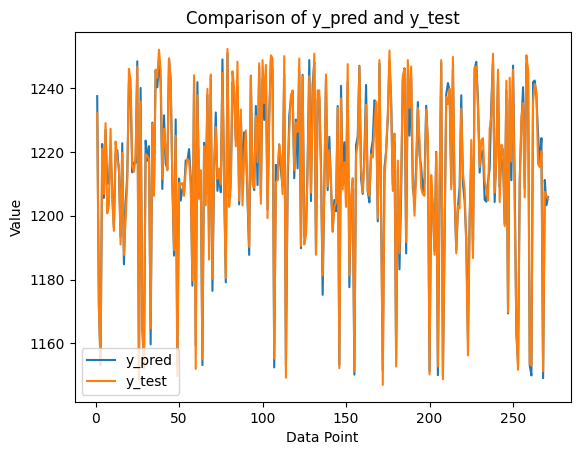

In [216]:
# Error
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2: {r2}")
x_values = range(1, len(y_pred) + 1)
plt.plot(x_values, y_pred, label='y_pred')
plt.plot(x_values, y_test, label='y_test')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison of y_pred and y_test')
plt.legend()
plt.show()

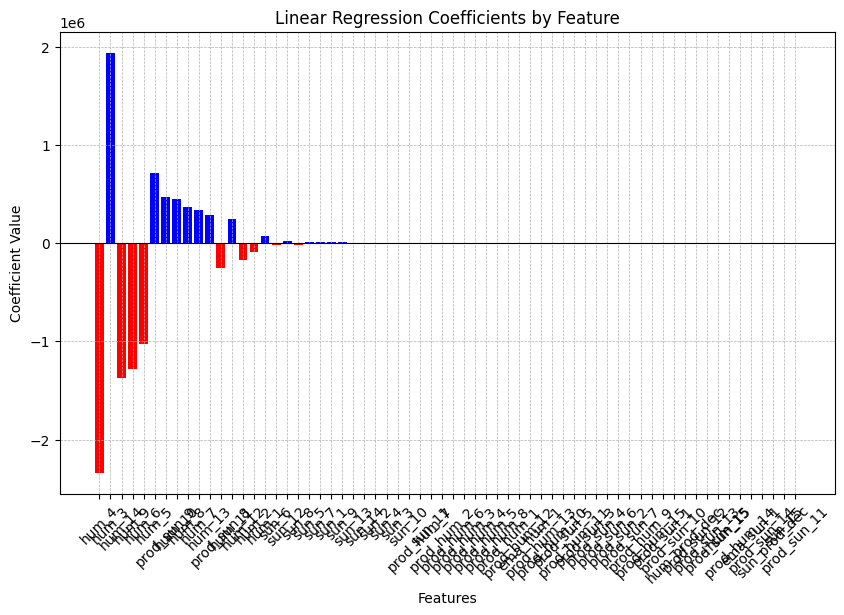

In [217]:
coefficients = model.coef_
features = X_train.columns

# Combine into a DataFrame
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
coeff_df['abs_coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_coefficient', ascending=False)
coeff_df = coeff_df.iloc[:16]



# Plotting
plt.figure(figsize=(10, 6))
plt.bar(coeff_df['Feature'], coeff_df['Coefficient'], color=['blue' if x > 0 else 'red' for x in coeff_df['Coefficient']])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients by Feature')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.8)  # Add a line at zero for reference
plt.show()

In [218]:
coeff_df.head(n=50)

,Feature,Coefficient,abs_coefficient
16,hum_4,-2.337665e+06,2.337665e+06
12,hum_3,1.938220e+06,1.938220e+06
56,hum_14,-1.374792e+06,1.374792e+06
36,hum_9,-1.283584e+06,1.283584e+06
24,hum_6,-1.025548e+06,1.025548e+06
20,hum_5,7.127219e+05,7.127219e+05
35,prod_sun_9,4.661854e+05,4.661854e+05
40,hum_10,4.534787e+05,4.534787e+05
32,hum_8,3.661666e+05,3.661666e+05
28,hum_7,3.372397e+05,3.372397e+05


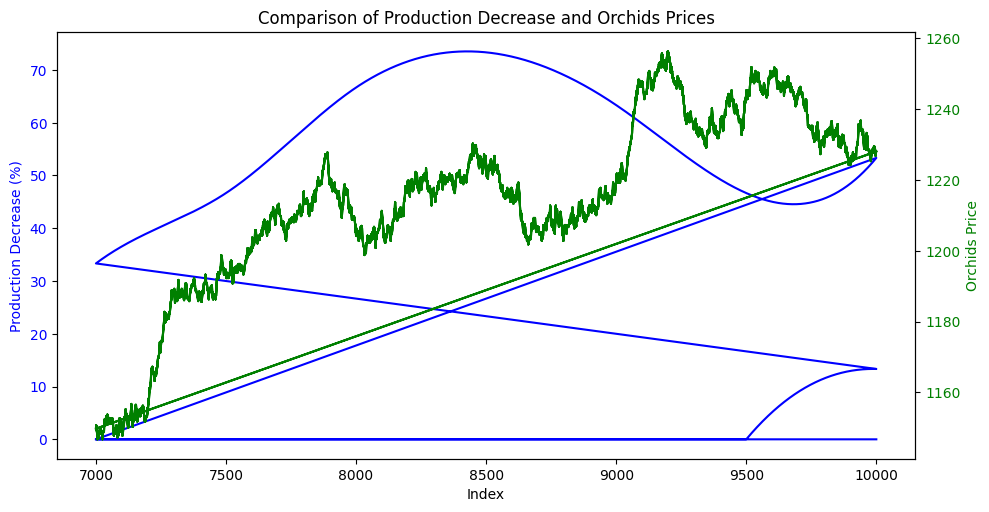

In [198]:
# HUMIDITY VS PRODUCTION DECREASE VS PRICE
fig, ax1 = plt.subplots(figsize=(10, 5))  # Create a figure and one subplot

# Plot production decrease on the primary y-axis
ax1.plot(data.index, X['sun_prod_dec'], label='Production Decrease', color='b')  # Plot Production Decrease on primary y-axis
ax1.set_xlabel('Index')  # Set the x-axis label
ax1.set_ylabel('Production Decrease (%)', color='b')  # Set the y-axis label for production decrease
ax1.tick_params(axis='y', labelcolor='b')  # Set the y-axis tick color for production decrease

# Create a secondary y-axis for ORCHIDS prices
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(data.index, y, label='Orchids Price', color='g')  # Plot Orchids Price on secondary y-axis
ax2.set_ylabel('Orchids Price', color='g')  # Set the y-axis label for ORCHIDS
ax2.tick_params(axis='y', labelcolor='g')  # Set the y-axis tick color for ORCHIDS

# Adjust layout and title
fig.tight_layout()  # Adjust the layout
plt.title('Comparison of Production Decrease and Orchids Prices')  # Set a more appropriate title
plt.show()

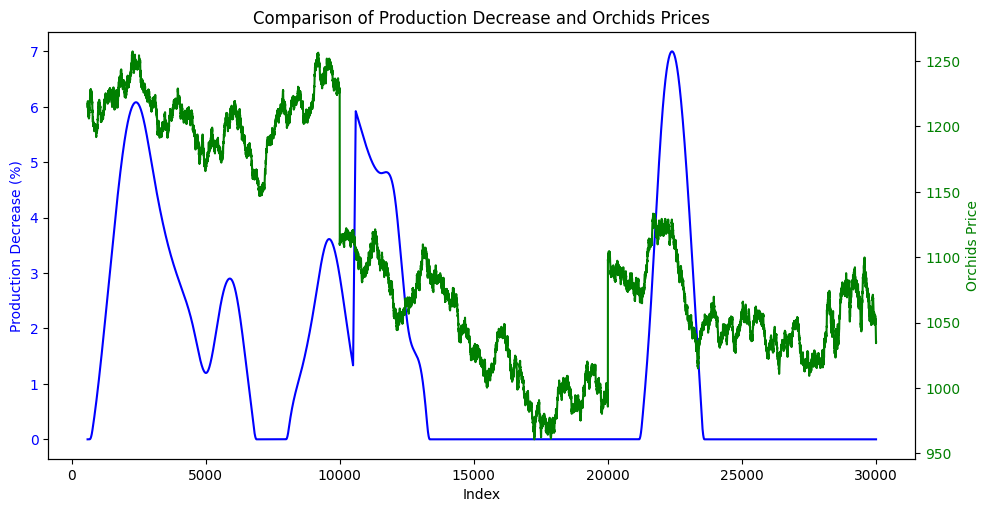

In [199]:
# HUMIDITY VS PRODUCTION DECREASE VS PRICE
shift = 500
window = 100

# Sample data setup (ensure you have the 'df' DataFrame loaded with 'ORCHIDS', 'SUNLIGHT', and 'HUMIDITY' columns)
data = pd.DataFrame()
data['price'] = df['ORCHIDS']

# Calculate production decrease due to humidity not being in the ideal range, adjust by -4% for every 10 minutes of insufficient sunlight
data['prod_dec'] = np.where((df["HUMIDITY"] < 60) | (df["HUMIDITY"] > 80), abs(df["HUMIDITY"] - 70) / 5.0 * 2.0 - 4, 0)
data['prod_dec'] = data['prod_dec'].shift(shift).rolling(window=window).mean()  # Shift if necessary based on your specific needs
data.dropna(inplace=True)  # Dropping rows where any data may be missing after the shift

fig, ax1 = plt.subplots(figsize=(10, 5))  # Create a figure and one subplot

# Plot production decrease on the primary y-axis
ax1.plot(data.index, data['prod_dec'], label='Production Decrease', color='b')  # Plot Production Decrease on primary y-axis
ax1.set_xlabel('Index')  # Set the x-axis label
ax1.set_ylabel('Production Decrease (%)', color='b')  # Set the y-axis label for production decrease
ax1.tick_params(axis='y', labelcolor='b')  # Set the y-axis tick color for production decrease

# Create a secondary y-axis for ORCHIDS prices
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(data.index, data['price'], label='Orchids Price', color='g')  # Plot Orchids Price on secondary y-axis
ax2.set_ylabel('Orchids Price', color='g')  # Set the y-axis label for ORCHIDS
ax2.tick_params(axis='y', labelcolor='g')  # Set the y-axis tick color for ORCHIDS

# Adjust layout and title
fig.tight_layout()  # Adjust the layout
plt.title('Comparison of Production Decrease and Orchids Prices')  # Set a more appropriate title
plt.show()

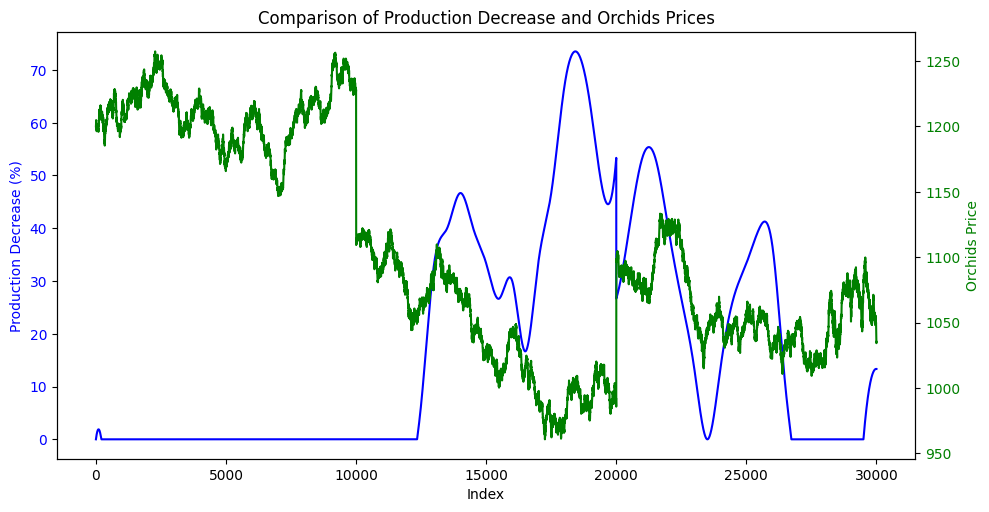

In [200]:
# SUNLIGHT VS PRODUCTION DECREASE VS PRICE
shift = 0
window = 1

# Sample data setup (ensure you have the 'df' DataFrame loaded with 'ORCHIDS', 'SUNLIGHT', and 'HUMIDITY' columns)
data = pd.DataFrame()
data['price'] = df['ORCHIDS']

# Calculate production decrease due to humidity not being in the ideal range, adjust by -4% for every 10 minutes of insufficient sunlight
data['prod_dec'] = np.where(df["SUNLIGHT"] < 2500, abs(df["SUNLIGHT"] - 2500) / 60 * 4, 0)
data['prod_dec'] = data['prod_dec'].shift(shift).rolling(window=window).mean()  # Shift if necessary based on your specific needs
data.dropna(inplace=True)  # Dropping rows where any data may be missing after the shift

fig, ax1 = plt.subplots(figsize=(10, 5))  # Create a figure and one subplot

# Plot production decrease on the primary y-axis
ax1.plot(data.index, data['prod_dec'], label='Production Decrease', color='b')  # Plot Production Decrease on primary y-axis
ax1.set_xlabel('Index')  # Set the x-axis label
ax1.set_ylabel('Production Decrease (%)', color='b')  # Set the y-axis label for production decrease
ax1.tick_params(axis='y', labelcolor='b')  # Set the y-axis tick color for production decrease

# Create a secondary y-axis for ORCHIDS prices
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(data.index, data['price'], label='Orchids Price', color='g')  # Plot Orchids Price on secondary y-axis
ax2.set_ylabel('Orchids Price', color='g')  # Set the y-axis label for ORCHIDS
ax2.tick_params(axis='y', labelcolor='g')  # Set the y-axis tick color for ORCHIDS

# Adjust layout and title
fig.tight_layout()  # Adjust the layout
plt.title('Comparison of Production Decrease and Orchids Prices')  # Set a more appropriate title
plt.show()

# prod_dec for humidity

In [201]:
data = pd.DataFrame()
data['price'] = df['ORCHIDS']

# Calculate production decrease due to humidity not being in the ideal range, adjust by -4% for every 10 minutes of insufficient sunlight
data['prod_dec'] = np.where((df["HUMIDITY"] < 60) | (df["HUMIDITY"] > 80), abs(df["HUMIDITY"] - 70) / 5.0 * 2.0 - 4, 0)
lags = range(0, 150, 5)
windows = range(1, 850, 10)

results = []
corr_data = {'Lag': [], 'Window Size': [], 'Correlation': []}
for lag in lags:
    for window in windows:
        data['lag_and_window'] = data['prod_dec'].shift(lag).rolling(window=window).mean()
        corr = data['price'].corr(data['lag_and_window'])
        results.append((lag, window, corr))
        corr_data['Lag'].append(lag)
        corr_data['Window Size'].append(window)
        corr_data['Correlation'].append(corr)

results.sort(key=lambda x: abs(x[2]), reverse=True)  # Sort by absolute correlation value
best_lag, best_window, best_corr = results[0]

print(f"Best Lag: {best_lag}, Best Window: {best_window}, Highest Correlation: {best_corr}")

Best Lag: 0, Best Window: 751, Highest Correlation: 0.5745981522269018


Best Lag: 82, Best Window: 100, Highest Correlation: 0.5597203376862226
Best Lag: 55, Best Window: 146, Highest Correlation: 0.5615607453263896
Best Lag: 0, Best Window: 751, Highest Correlation: 0.5745981522269018

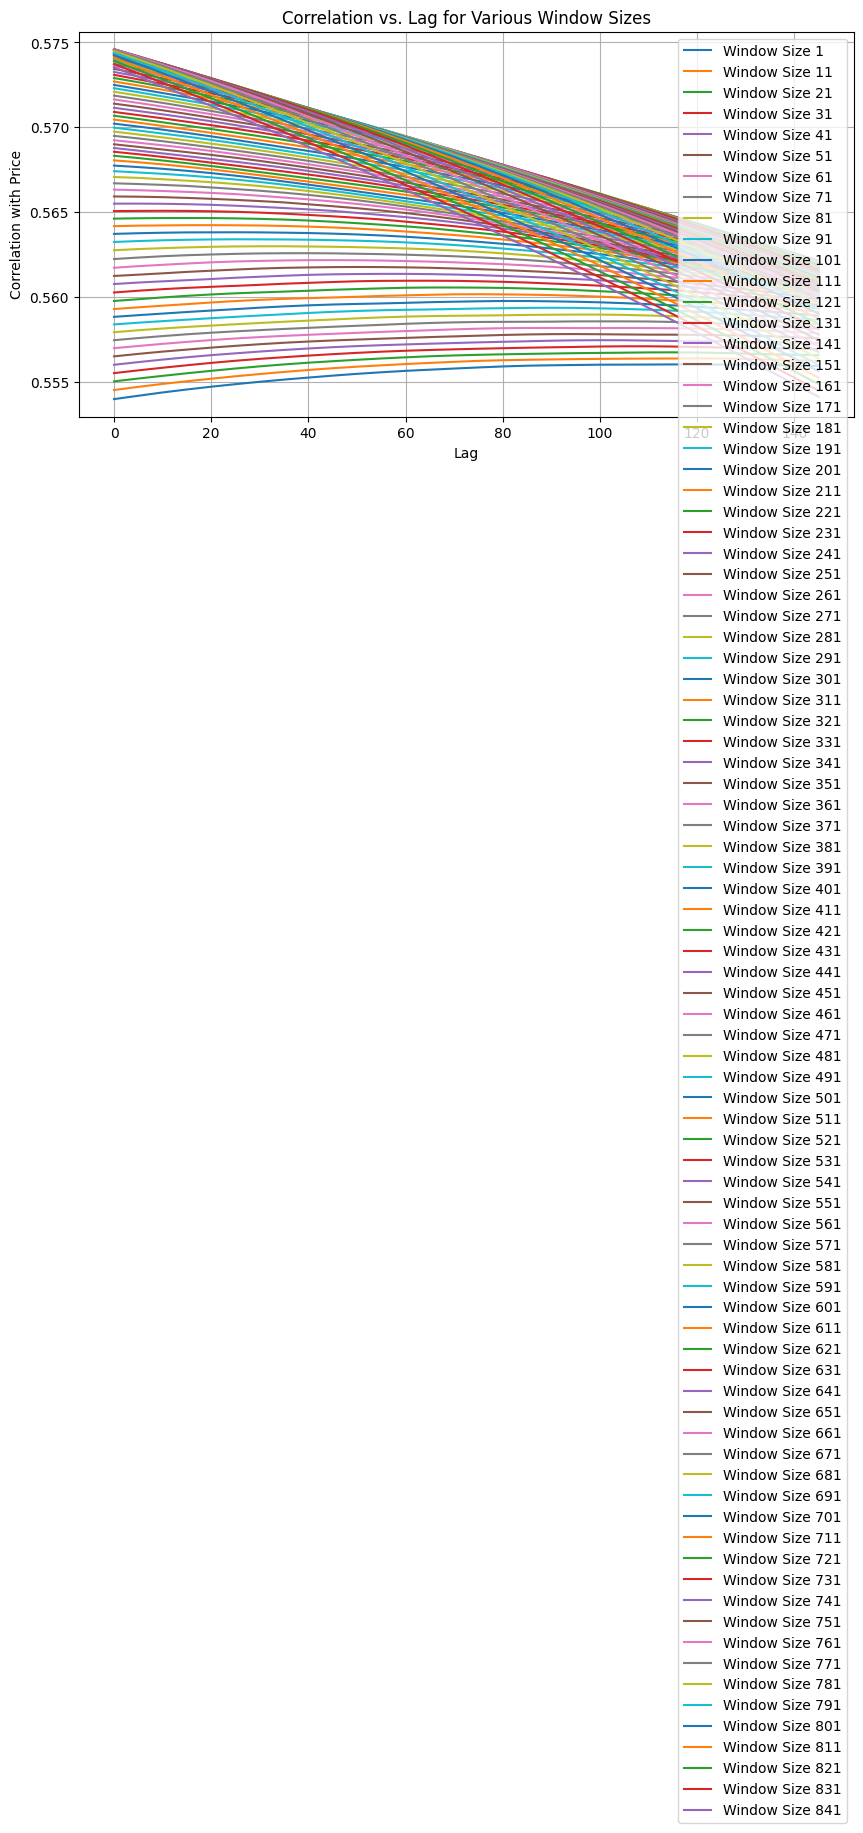

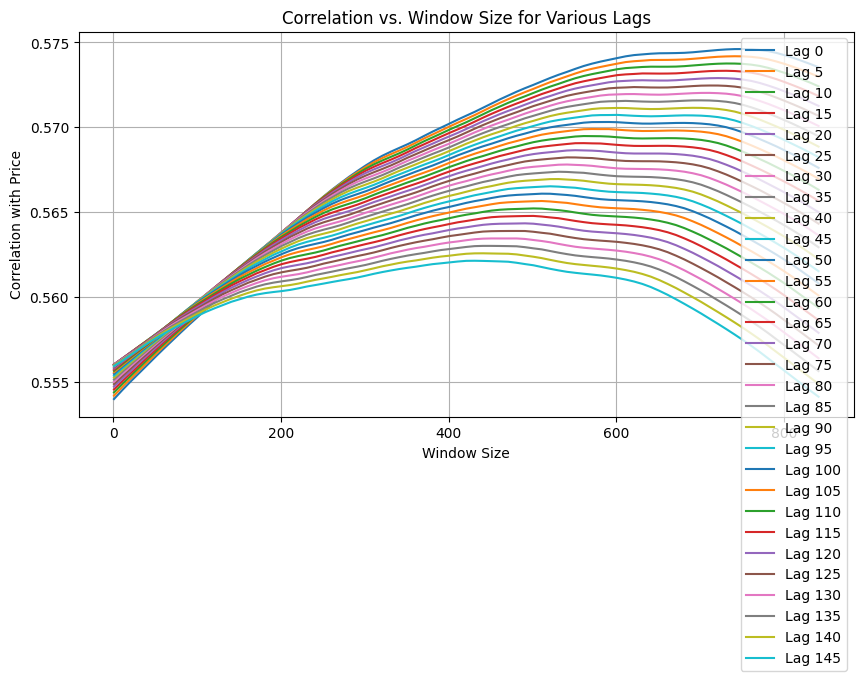

In [202]:
corr_data = pd.DataFrame(corr_data)

plt.figure(figsize=(10, 5))
for window in windows:
    plt.plot(corr_data[corr_data['Window Size'] == window]['Lag'],
             corr_data[corr_data['Window Size'] == window]['Correlation'],
             label=f'Window Size {window}')
plt.xlabel('Lag')
plt.ylabel('Correlation with Price')
plt.title('Correlation vs. Lag for Various Window Sizes')
plt.legend()
plt.grid(True)
plt.show()

# Plot Correlation vs Window Size for a constant lag (example: the smallest lag)
plt.figure(figsize=(10, 5))
for lag in lags:
    plt.plot(corr_data[corr_data['Lag'] == lag]['Window Size'],
             corr_data[corr_data['Lag'] == lag]['Correlation'],
             label=f'Lag {lag}')
plt.xlabel('Window Size')
plt.ylabel('Correlation with Price')
plt.title('Correlation vs. Window Size for Various Lags')
plt.legend()
plt.grid(True)
plt.show()

# prod_dec for sunlight

In [203]:
# SUNLIGHT_PER_TS = 2500 * 12 / 1_000_000
SUNLIGHT_PER_TS = 2500
TS_PER_MIN = 1_000_000 / 12 / 60
data = pd.DataFrame()
data['price'] = df['ORCHIDS']

# Calculate production decrease due to humidity not being in the ideal range, adjust by -4% for every 10 minutes of insufficient sunlight
data['prod_dec'] = np.where(df["SUNLIGHT"] < 2500, abs(df["SUNLIGHT"] - 2500) / 60 * 4, 0)
lags = range(0, 150, 5)
windows = range(1, 850, 10)

results = []
corr_data = {'Lag': [], 'Window Size': [], 'Correlation': []}
for lag in lags:
    for window in windows:
        data['lag_and_window'] = data['prod_dec'].shift(lag).rolling(window=window).mean()
        corr = data['price'].corr(data['lag_and_window'])
        results.append((lag, window, corr))
        corr_data['Lag'].append(lag)
        corr_data['Window Size'].append(window)
        corr_data['Correlation'].append(corr)

results.sort(key=lambda x: abs(x[2]), reverse=True)  # Sort by absolute correlation value
best_lag, best_window, best_corr = results[0]

print(f"Best Lag: {best_lag}, Best Window: {best_window}, Highest Correlation: {best_corr}")

Best Lag: 0, Best Window: 1, Highest Correlation: -0.6230570513845172


Best Lag: 0, Best Window: 1, Highest Correlation: -0.6230570513845172

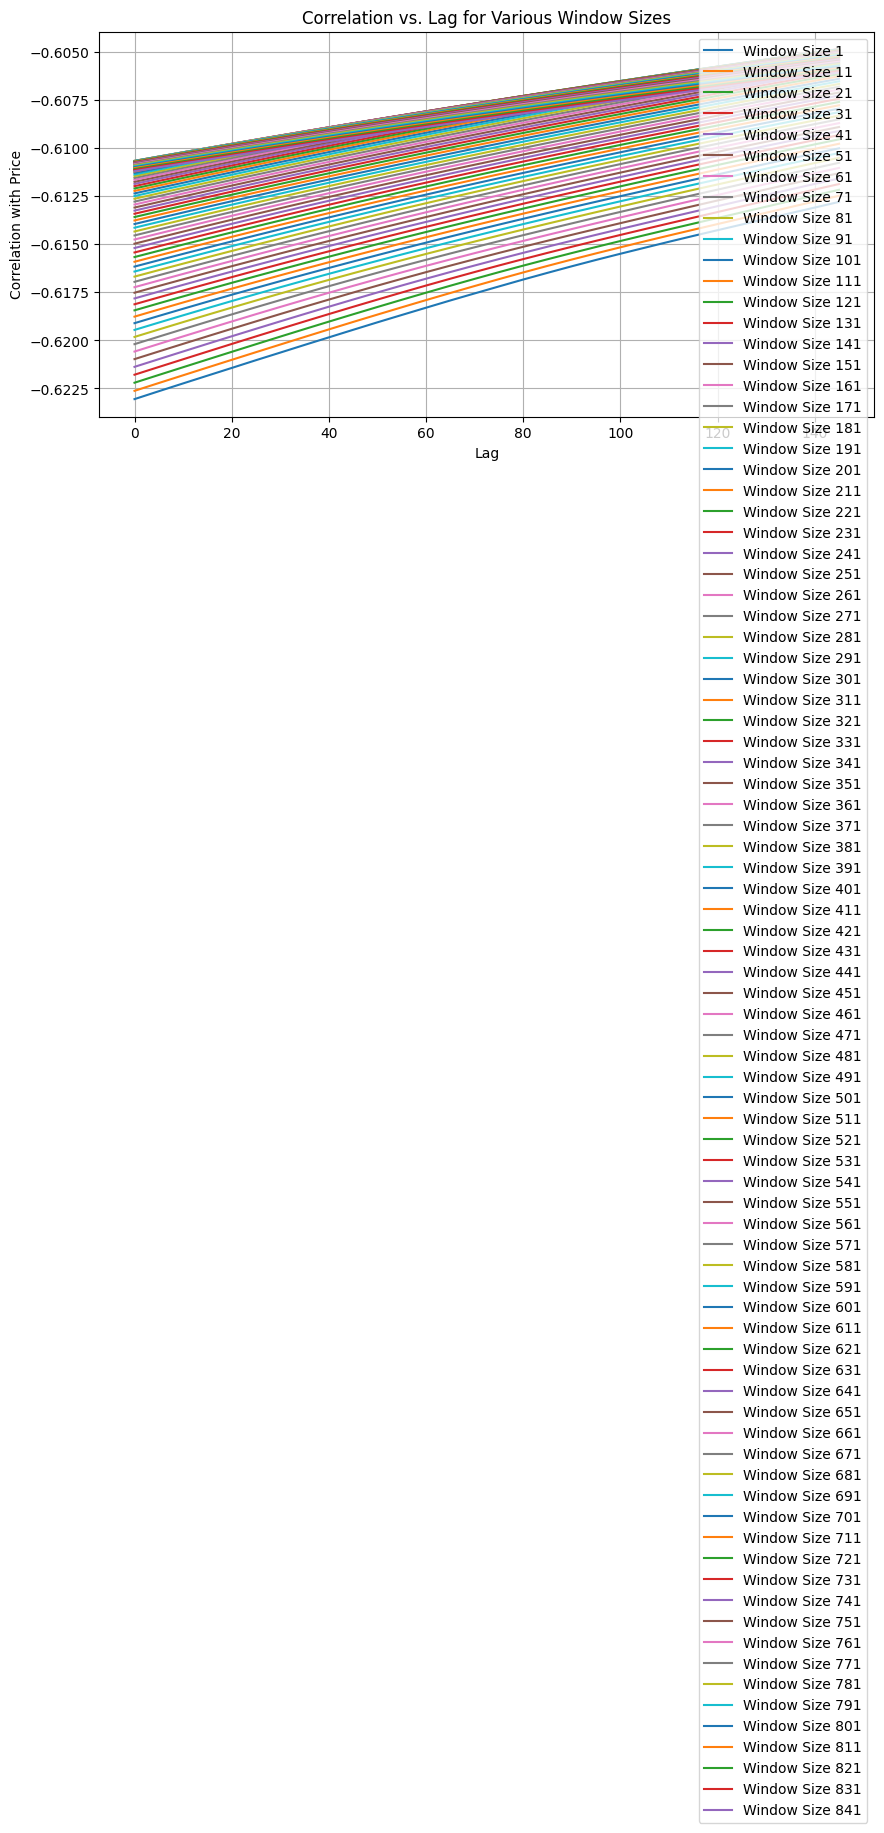

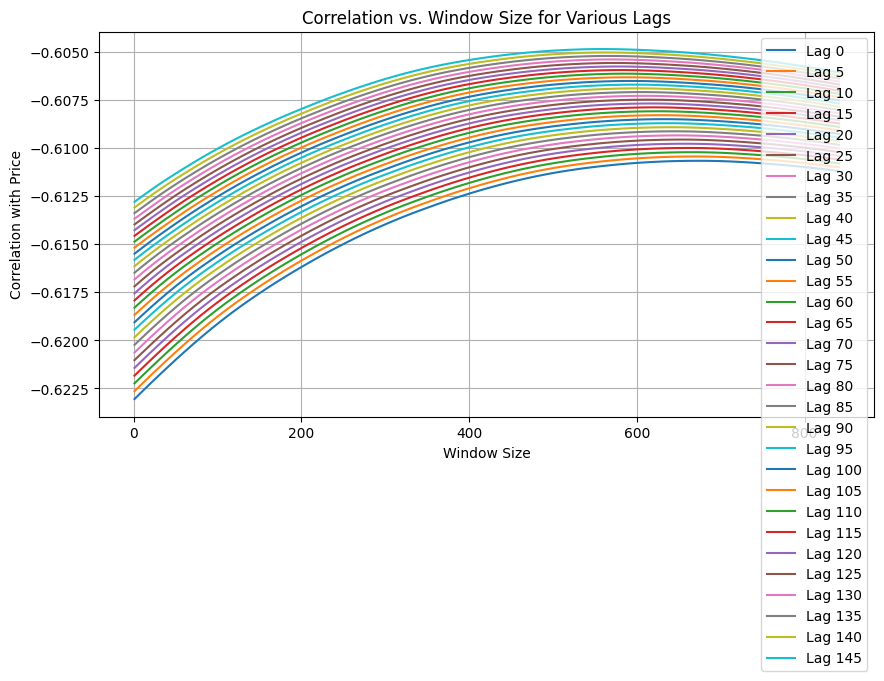

In [204]:
corr_data = pd.DataFrame(corr_data)

plt.figure(figsize=(10, 5))
for window in windows:
    plt.plot(corr_data[corr_data['Window Size'] == window]['Lag'],
             corr_data[corr_data['Window Size'] == window]['Correlation'],
             label=f'Window Size {window}')
plt.xlabel('Lag')
plt.ylabel('Correlation with Price')
plt.title('Correlation vs. Lag for Various Window Sizes')
plt.legend()
plt.grid(True)
plt.show()

# Plot Correlation vs Window Size for a constant lag (example: the smallest lag)
plt.figure(figsize=(10, 5))
for lag in lags:
    plt.plot(corr_data[corr_data['Lag'] == lag]['Window Size'],
             corr_data[corr_data['Lag'] == lag]['Correlation'],
             label=f'Lag {lag}')
plt.xlabel('Window Size')
plt.ylabel('Correlation with Price')
plt.title('Correlation vs. Window Size for Various Lags')
plt.legend()
plt.grid(True)
plt.show()